In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from utility import analysis_parameters as ap, util
import numpy as np
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

colors = ap.COLORS

# Plot precip rates

In [2]:
models = ["NICAM", "SCREAM", "UM", "SAM"]
prtime_days = [i/24/4 for i in range(30*24*4)]
print(len(prtime_days))

2880


In [3]:
for i, m in enumerate(models):
    pr = xr.open_dataset(ap.get_fldmean_file(m, "pr", "gt")).pr[:,0,0]
    print(m, pr.shape)

NICAM (2880,)
SCREAM (2976,)
UM (2880,)
SAM (2975,)


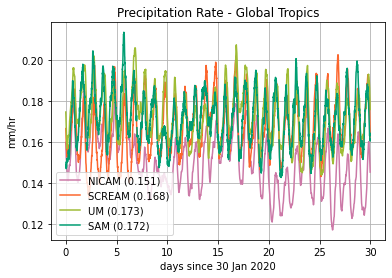

In [7]:
cumsum=False
fig, ax = plt.subplots(1,1, figsize=(6,4))
for i, m in enumerate(models):
    pr = xr.open_dataset(ap.get_fldmean_file(m, "pr", "gt")).pr[:,0,0]
    if cumsum:
        if m.lower()!="sam":
            pr = util.convert_to_mmhr(m, pr)
        pr = pr[:2880].cumsum()*0.25
        ax.plot(prtime_days, pr, color=colors[m], label=m+" ({})".format(int(pr[2879])))
    else:
        pr = util.convert_to_mmhr(m, pr)
        ax.plot(prtime_days, pr[:2880], color=colors[m], label=m+" ({0:0.3g})".format(np.nanmean(pr[:2880])))
ax.legend()
ax.grid(True)
if cumsum:
    ax.set_title("Accumulated Precipitation - Global Tropics")
    ax.set_ylabel("mm")
    ax.set_xlabel("days since 30 Jan 2020")
    plt.savefig("../plots/GT/pracc_30days.png")
else:
    ax.set_title("Precipitation Rate - Global Tropics")
    ax.set_ylabel("mm/hr")
    ax.set_xlabel("days since 30 Jan 2020")
    plt.savefig("../plots/GT/pr_30days.png")
plt.show()